# Data Exploration

In [16]:
# Import libraries in alphabetical order
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from IPython.display import display

In [9]:
#Setting the plotting theme
sns.set_theme(style='darkgrid', context='talk',palette='bright')
#Style: controls the presence of lines and background in the graph
#Context: controls the relative thickness and size of elements --> talk (PowerPoint)
#Palette: controls the set of colors used for the data.

In [17]:
pd.set_option('display.max_columns', None)

## GeoFeatures_Zurich_provided_by_UrbanDataLabs

### Fields:

- **x, y:** Coordinates in EPSG 2056
- **lat, lng:** Coordinates in latitude, longitude
- **hh_ha, pers_ha:** Density of households and persons per hectare
- **pt_class:** Public transport quality class according to Federal Office for Spatial Development
- **pt_dis:** Distance to next stop (as the crow flies)
- **station_dis:** Distance to railway station
- **noise_street:** Road noise according to BAFU
- **bldg_foot:** Building footprint in m²
- **bldg_corner:** Building is located at an intersection
- **bldg_500:** Number of buildings in 500m radius
- **net_acc:** Size of catchment area in 2 min driving time

In [2]:
# Read GeoFeatures_Zurich_provided_by_UrbanDataLabs file
df = pd.read_csv("/Users/lisach./Desktop/GeoFeatures_Zurich_and_supermarkets.csv")
df.head()

,hh_ha,pers_ha,pt_dis,station_dis,lat,lng,geometry,migros,coop,discounter,other,competitors,all_supermarkets
0,8,10,55,1725,47.3631,8.53425,POINT (47.3631 8.53425),0.0,0.0,0.0,0.0,0.0,0.0
1,53,100,50,1700,47.3634,8.53425,POINT (47.3634 8.53425),0.0,0.0,0.0,0.0,0.0,0.0
2,8,10,75,1770,47.3627,8.53457,POINT (47.3627 8.53457),0.0,0.0,0.0,0.0,0.0,0.0
3,8,10,55,1745,47.3629,8.53457,POINT (47.3629 8.53457),0.0,0.0,0.0,0.0,0.0,0.0
4,8,10,35,1720,47.3631,8.53458,POINT (47.3631 8.53458),0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Num of supermarkets

test = df[df["all_supermarkets"] >= 1]
test.shape

(210, 13)

In [4]:
# Select columns
df = df[["hh_ha", "pers_ha", "pt_dis", "station_dis", "migros", "coop", "discounter", "other", "competitors", "all_supermarkets"]]


In [5]:
df.dtypes

hh_ha                 int64
pers_ha               int64
pt_dis                int64
station_dis           int64
migros              float64
coop                float64
discounter          float64
other               float64
competitors         float64
all_supermarkets    float64
dtype: object

In [6]:
# Null values

# Summary by column
summary_nulls = df.isnull().sum() / len(df)*100
print(summary_nulls)

# Replace nulls with 0's
df = df.fillna(0)

summary_nulls = df.isnull().sum() / len(df)*100
summary_nulls

hh_ha               0.0
pers_ha             0.0
pt_dis              0.0
station_dis         0.0
migros              0.0
coop                0.0
discounter          0.0
other               0.0
competitors         0.0
all_supermarkets    0.0
dtype: float64


hh_ha               0.0
pers_ha             0.0
pt_dis              0.0
station_dis         0.0
migros              0.0
coop                0.0
discounter          0.0
other               0.0
competitors         0.0
all_supermarkets    0.0
dtype: float64

In [7]:
# Data cleaning --> we shouldn't do that, as that means, there are two Migros

#df[df["migros"] == 2] = 1


In [8]:
round(df.describe(),2)

,hh_ha,pers_ha,pt_dis,station_dis,migros,coop,discounter,other,competitors,all_supermarkets
count,126331.00,126331.00,126331.00,126331.00,126331.00,126331.00,126331.00,126331.00,126331.00,126331.00
mean,25.43,52.51,208.82,4146.85,0.00,0.00,0.00,0.00,0.00,0.00
std,33.32,66.07,148.93,2066.86,0.02,0.03,0.02,0.02,0.04,0.05
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,110.00,2615.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,11.00,26.00,175.00,3950.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,41.00,87.00,255.00,5335.00,0.00,0.00,0.00,0.00,0.00,0.00
max,255.00,546.00,1290.00,10230.00,2.00,3.00,2.00,1.00,3.00,3.00


In [18]:
#Groupby Migros
round(df.groupby(['migros']).describe(),2)
# --> looks like: at places with 1 or more Migros stores, there is on average a higher density of people/ households

hh_ha                                               pers_ha         \
           count   mean    std  min   25%   50%   75%    max     count   mean   
migros                                                                          
0.0     126288.0  25.43  33.32  0.0   0.0  11.0  41.0  255.0  126288.0  52.51   
1.0         41.0  27.44  35.81  0.0   0.0   7.0  53.0  118.0      41.0  53.34   
2.0          2.0  48.00  67.88  0.0  24.0  48.0  72.0   96.0       2.0  96.50   

                                                   pt_dis                  \
           std  min    25%   50%     75%    max     count    mean     std   
migros                                                                      
0.0      66.06  0.0   0.00  26.0   87.00  546.0  126288.0  208.84  148.94   
1.0      68.06  0.0   0.00  17.0  106.00  224.0      41.0  140.24   57.55   
2.0     136.47  0.0  48.25  96.5  144.75  193.0       2.0   50.00    0.00   

                                          station_dis                    \
         min    25%    50%    75%     max       count     mean      std   
migros                                                                    
0.0      0.0  110.0  175.0  255.0  1290.0    126288.0  4147.53  2066.74   
1.0     50.0   75.0  150.0  180.0   250.0        41.0  2133.54  1325.39   
2.0     50.0   50.0   50.0   50.0    50.0         2.0  2487.50  1827.87   

                                                       coop                   \
           min      25%     50%      75%      max     count  mean   std  min   
migros                                                                         
0.0        0.0  2615.00  3950.0  5335.00  10230.0  126288.0  0.00  0.03  0.0   
1.0       55.0  1110.00  2190.0  2850.00   5090.0      41.0  0.02  0.16  0.0   
2.0     1195.0  1841.25  2487.5  3133.75   3780.0       2.0  0.00  0.00  0.0   

                           discounter                                      \
        25%  50%  75%  max      count mean   std  min  25%  50%  75%  max   
migros                                                                      
0.0     0.0  0.0  0.0  3.0   126288.0  0.0  0.02  0.0  0.0  0.0  0.0  2.0   
1.0     0.0  0.0  0.0  1.0       41.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
2.0     0.0  0.0  0.0  0.0        2.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0   

           other                                      competitors              \
           count  mean   std  min  25%  50%  75%  max       count  mean   std   
migros                                                                          
0.0     126288.0  0.00  0.02  0.0  0.0  0.0  0.0  1.0    126288.0  0.00  0.04   
1.0         41.0  0.02  0.16  0.0  0.0  0.0  0.0  1.0        41.0  0.05  0.22   
2.0          2.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0         2.0  0.00  0.00   

                                all_supermarkets                             \
        min  25%  50%  75%  max            count  mean   std  min  25%  50%   
migros                                                                        
0.0     0.0  0.0  0.0  0.0  3.0         126288.0  0.00  0.04  0.0  0.0  0.0   
1.0     0.0  0.0  0.0  0.0  1.0             41.0  1.05  0.22  1.0  1.0  1.0   
2.0     0.0  0.0  0.0  0.0  0.0              2.0  2.00  0.00  2.0  2.0  2.0   

                  
        75%  max  
migros            
0.0     0.0  3.0  
1.0     1.0  2.0  
2.0     2.0  2.0

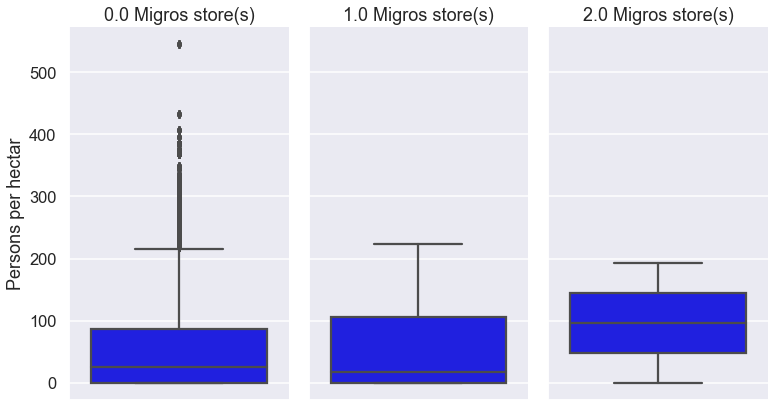

In [35]:
# Add plots (boxplots?) for main metrics
#df.groupby('migros')['pers_ha'].plot

g=sns.catplot(y="pers_ha",
                col="migros",
                data=df, kind="box",
                height=6, aspect=.6,color = 'blue')
g.set_axis_labels("", "Persons per hectar").set_titles("{col_name}"+" Migros store(s)")

In [9]:
# Correlation?
df.corr(method="pearson")

,hh_ha,pers_ha,pt_dis,station_dis,migros,coop,discounter,other,competitors,all_supermarkets
hh_ha,1.000000,0.961563,-0.276513,-0.254892,0.002083,0.007235,-0.005097,0.000543,0.002336,0.002989
pers_ha,0.961563,1.000000,-0.281431,-0.234213,0.001278,0.007424,-0.005607,-0.000693,0.001664,0.002039
pt_dis,-0.276513,-0.281431,1.000000,0.356661,-0.009304,-0.013048,0.007448,0.000819,-0.004407,-0.007969
station_dis,-0.254892,-0.234213,0.356661,1.000000,-0.017346,-0.017684,0.005793,-0.001171,-0.009285,-0.015810
migros,0.002083,0.001278,-0.009304,-0.017346,1.000000,0.014199,-0.000349,0.023183,0.019191,0.450685
coop,0.007235,0.007424,-0.013048,-0.017684,0.014199,1.000000,-0.000496,-0.000440,0.675556,0.609324
discounter,-0.005097,-0.005607,0.007448,0.005793,-0.000349,-0.000496,1.000000,0.145869,0.607415,0.542178
other,0.000543,-0.000693,0.000819,-0.001171,0.023183,-0.000440,0.145869,1.000000,0.501338,0.457670
competitors,0.002336,0.001664,-0.004407,-0.009285,0.019191,0.675556,0.607415,0.501338,1.000000,0.901167
all_supermarkets,0.002989,0.002039,-0.007969,-0.015810,0.450685,0.609324,0.542178,0.457670,0.901167,1.000000


Strong correlation between:
<br>-pers_ha and hh_ha

In [10]:
# Plot correlations?

In [11]:
migros_df = df[df["migros"] != 0]
print(migros_df.shape)
migros_df.head()

(43, 10)


,hh_ha,pers_ha,pt_dis,station_dis,migros,coop,discounter,other,competitors,all_supermarkets
7395,0,0,225,2190,1.0,0.0,0.0,0.0,0.0,1.0
15653,86,127,160,4050,1.0,0.0,0.0,0.0,0.0,1.0
16178,0,0,110,2450,1.0,0.0,0.0,0.0,0.0,1.0
19619,0,0,50,3780,2.0,0.0,0.0,0.0,0.0,2.0
20205,96,193,50,1195,2.0,0.0,0.0,0.0,0.0,2.0


In [12]:
competitors = df[(df["all_supermarkets"] >= 1) & (df["migros"] == 0)]
print(competitors.shape)
competitors.head()

(167, 10)


,hh_ha,pers_ha,pt_dis,station_dis,migros,coop,discounter,other,competitors,all_supermarkets
1618,106,143,110,3010,0.0,0.0,0.0,1.0,1.0,1.0
1636,3,3,160,4540,0.0,0.0,1.0,0.0,1.0,1.0
4349,117,204,145,1835,0.0,1.0,0.0,0.0,1.0,1.0
4766,54,87,160,8510,0.0,0.0,0.0,1.0,1.0,1.0
6617,14,64,225,3000,0.0,1.0,0.0,0.0,1.0,1.0


# Logistic Regression

In [16]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [25]:
df.corr(method="pearson")

,hh_ha,pers_ha,pt_dis,station_dis,migros,coop,discounter,other,competitors,all_supermarkets
hh_ha,1.000000,0.961561,-0.276488,-0.254844,0.000432,0.006741,-0.005533,-0.000132,0.002041,0.002288
pers_ha,0.961561,1.000000,-0.281405,-0.234164,-0.000448,0.006902,-0.006067,-0.001377,0.001354,0.001320
pt_dis,-0.276488,-0.281405,1.000000,0.356681,-0.009299,-0.013711,0.006349,-0.000460,-0.004928,-0.007801
station_dis,-0.254844,-0.234164,0.356681,1.000000,-0.018859,-0.018646,0.004290,-0.002948,-0.010019,-0.016135
migros,0.000432,-0.000448,-0.009299,-0.018859,1.000000,0.045995,0.037775,0.072957,0.041475,0.429422
coop,0.006741,0.006902,-0.013711,-0.018646,0.045995,1.000000,0.024885,0.032076,0.679371,0.622788
discounter,-0.005533,-0.006067,0.006349,0.004290,0.037775,0.024885,1.000000,0.179861,0.612238,0.555537
other,-0.000132,-0.001377,-0.000460,-0.002948,0.072957,0.032076,0.179861,1.000000,0.508070,0.471044
competitors,0.002041,0.001354,-0.004928,-0.010019,0.041475,0.679371,0.612238,0.508070,1.000000,0.916019
all_supermarkets,0.002288,0.001320,-0.007801,-0.016135,0.429422,0.622788,0.555537,0.471044,0.916019,1.000000


In [37]:
# Dependant variable: "migros_boolean"
dep_var = ["migros"]

# Independent variables:
indep_var = ["hh_ha", "pers_ha", "pt_dis", "competitors"]

# Model:
x = df[indep_var]
y = df[dep_var]

logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.006648
         Iterations 14
                         Results: Logit
Model:              Logit            Pseudo R-squared: -1.174   
Dependent Variable: migros           AIC:              1687.7808
Date:               2021-09-03 18:16 BIC:              1726.7674
No. Observations:   126331           Log-Likelihood:   -839.89  
Df Model:           3                LL-Null:          -386.37  
Df Residuals:       126327           LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     14.0000                                     
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
hh_ha            0.0443   0.0294   1.5056 0.1322 -0.0134  0.1019
pers_ha         -0.0733   0.0154  -4.7559 0.0000 -0.1035 -0.0431
pt_dis      